In [24]:
%load_ext autoreload
%autoreload 2

import glob
import os

import matplotlib.pyplot as plt
import model as m
import numpy as np
import torchvision.transforms as transforms
from data import get_skinlesion, standardize_skinlesion_inv

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
train_dataset, val_dataset, test_dataset, train_loader, val_loader, test_loader = get_skinlesion(
    batch_size=4, num_workers=4, data_augmentation=True)

In [26]:
len(train_dataset), len(val_dataset), len(test_dataset)

(160, 20, 20)

In [27]:
# # This should be run where trainset is not standardized.
im, label = train_dataset[0]
channel_mean_sum = im.mean((1, 2))
channel_std_sum = im.std((1, 2))
for i in range(1, len(train_dataset)):
    im, label = train_dataset[i]
    channel_mean_sum += im.mean((1, 2))
    channel_std_sum += im.std((1, 2))

channel_mean = channel_mean_sum / len(train_dataset)
channel_std = channel_std_sum / len(train_dataset)
channel_mean, channel_std

(tensor([-0.0003,  0.0002,  0.0001]), tensor([1.0001, 1.0002, 1.0000]))

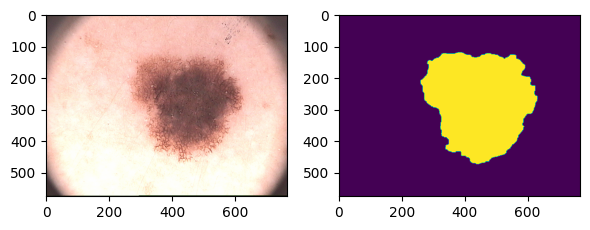

In [28]:
im, label = train_dataset[0]
im = standardize_skinlesion_inv(im)
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(6, 3), tight_layout=True)
ax0.imshow(np.moveaxis(im.numpy(), 0, 2))
ax1.imshow(label.numpy()[0]);

In [36]:
for i in range(len(train_dataset)):
    im, label = train_dataset[i]
    resized_im = transforms.Resize(size=(576,767))(im)
    print(resized_im.shape)

torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([3, 576, 767])
torch.Size([